---
layout: page
title: Visualização de Dados
nav_order: 7
---
[<img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/flaviovdf/fcd/blob/master/_lessons/06-Viz.ipynb)

# Tópico 7 – DataViz: Visualizando Dados 📈
{: .no_toc .mb-2 }

Um pouco de como representar dados de forma visual!
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Junto com a aula passada, ferramentas simples para exploração de dados
1. Aprender a base de pandas para realizar um plot simples
1. Aprender conceitos básicos de visualização dados

{: .no_toc .text-delta }
Material Adaptador do [DSC10 (UCSD)](https://dsc10.com/)

In [1]:
# Descomente e execute as linhas a seguir para usar o BabyPandas e o PandasTutor
# (faça isso apenas se não tiver instalado ainda)
# ! pip install babypandas

In [2]:
import numpy as np
import babypandas as bpd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from IPython.display import HTML, display, IFrame

### Além: atalhos de teclado

Existem vários atalhos de teclado integrados aos Jupyter Notebooks projetados para ajudar você a economizar tempo. Para vê-los, clique no botão do teclado na barra de ferramentas acima ou pressione a tecla H do teclado (desde que você não esteja editando ativamente uma célula).

Atalhos particularmente úteis:

| Ação | Atalho de teclado |
| --- | --- |
| Executar célula + pular para a próxima célula | MUDANÇA + ENTER |
| Salve o caderno | CTRL/CMD + S |
| Criar nova célula acima/abaixo | A/B |
| Excluir célula | DD |

### Agenda

- Por que visualizar?
- Terminologia.
- Gráficos de dispersão.
- Gráficos de linha.
- Gráficos de barra.

## Por que visualizar?

### Marcha de Napoleão

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/images/minard.jpg)

### Por que visualizar?

- Os computadores são melhores que os humanos para processar números, mas os humanos são melhores para identificar padrões visuais.

- As visualizações permitem-nos compreender rapidamente muitos dados – tornam mais fácil identificar tendências e comunicar os nossos resultados a outras pessoas.

- Existem vários tipos de visualizações; nesta aula, veremos gráficos de dispersão, gráficos de linhas, gráficos de barras e histogramas, mas existem muitos outros.
- A escolha certa depende do tipo de dados.

## Terminologia

### Indivíduos e variáveis

<center><img src='https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/images/ind-var.png' largura=90%/></center>

- <span style="color:#6d9eeb"><b>Indivíduo (linha):</b></span> Pessoa/lugar/coisa para a qual os dados são registrados. Também chamada de **observação**.

- <span style="color:#ff9900"><b>Variável (coluna):</b></span> Algo que é registrado para cada indivíduo. Também chamado de **recurso**.

### Tipos de variáveis

Existem dois tipos principais de variáveis:

- **Numérico**: Faz sentido fazer aritmética com os valores.
- **Categórico**: Os valores se enquadram em categorias, que podem ou não ter alguma _ordem_ para eles.

### Exemplos de variáveis ​​numéricas

- Salários dos jogadores da NBA 🏀.
- Individual: um jogador da NBA.
- Variável: seu salário.

- Ganhos brutos do filme 💰.
- Individual: um filme.
- Variável: seu rendimento bruto.

- Doses de reforço administradas por dia 💉.
- Individual: data.
- Variável: número de doses de reforço administradas naquela data.

### Exemplos de variáveis ​​​​categóricas

- Gêneros de filmes 🎬.
- Individual: um filme.
- Variável: seu gênero.

- CEPs 🏠.
- Pessoa física: residente nos EUA.
- Variável: CEP.
- Apesar de parecerem números, os CEPs são categóricos (a aritmética não faz sentido).

- Nível de experiência anterior em programação para alunos do DSC 10 🧑‍🎓.
- Individual: aluno do DSC 10.
- Variável: seu nível de experiência anterior em programação, por ex. nenhum, baixo, médio ou alto.
- Existe uma _ordem_ para essas categorias!

### Verificação de conceito ✅

Qual destas **não** é uma variável numérica?

A. Economia de combustível em milhas por galão.

B. Número de trimestres na UCSD.

C. Faculdade na UCSD (sexto, sétimo, etc).

D. Número da conta bancária.

E. Mais de uma destas não são variáveis ​​numéricas.

### Tipos de visualizações

O tipo de visualização que criamos depende dos tipos de variáveis ​​que estamos visualizando.

- **Gráfico de dispersão**: numérico versus numérico.
- **Gráfico de linhas**: numérico sequencial (tempo) vs.
- **Gráfico de barras**: categórico vs. numérico.
- **Histograma**: numérico.
- Cobriremos na próxima vez.

**Observação:** Podemos trocar as palavras "plot", "chart" e "graph"; todos eles significam a mesma coisa.

## Gráficos de dispersão

### Conjunto de dados dos 50 atores de maior bilheteria

|Coluna |Conteúdo|
|----------|------------|
`'Ator'`|Nome do ator
`'Total Bruto'`| Receita total bruta de bilheteria interna, em milhões de dólares, de todos os filmes do ator
`'Número de filmes'`| O número de filmes em que o ator esteve
`'Média por Filme'`| Total bruto dividido pelo número de filmes
`'Filme #1'`| O filme de maior bilheteria em que o ator já esteve
`'Bruto'`| Receita bruta de bilheteria interna, em milhões de dólares, do filme número 1 do ator

In [3]:
actors = bpd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/data/actors.csv').set_index('Actor')
actors

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
...,...,...,...,...,...
Jeremy Renner,2500.3,21,119.1,The Avengers,623.4
Philip Seymour Hoffman,2463.7,40,61.6,Catching Fire,424.7
Sandra Bullock,2462.6,35,70.4,Minions,336.0


### Gráficos de dispersão

Qual é a relação entre `'Número de Filmes'` e `'Total Bruto'`?

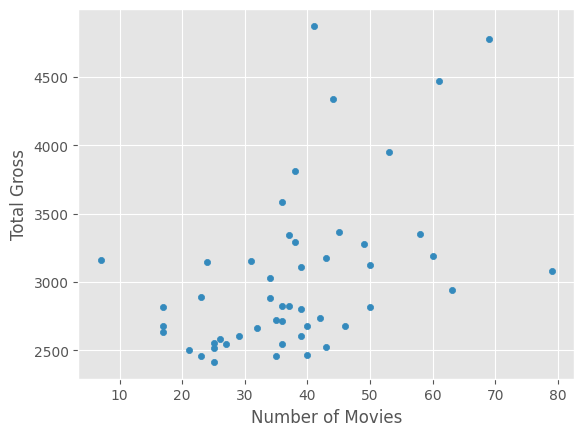

In [4]:
actors.plot(kind='scatter', x='Number of Movies', y='Total Gross');

### Gráficos de dispersão

- Os gráficos de dispersão visualizam a relação entre duas variáveis ​​numéricas.
- Para criar um a partir de um DataFrame `df`, use
```
df.plot(
    kind='scatter', 
    x=x_column_for_horizontal, 
    y=y_column_for_vertical
)
```
- O gráfico de dispersão resultante tem um ponto por linha de `df`.
- Se você colocar um ponto e vírgula após uma chamada para `.plot`, isso ocultará a saída de texto estranha exibida.

### Gráficos de dispersão

Qual é a relação entre `'Número de Filmes'` e `'Média por Filme'`?

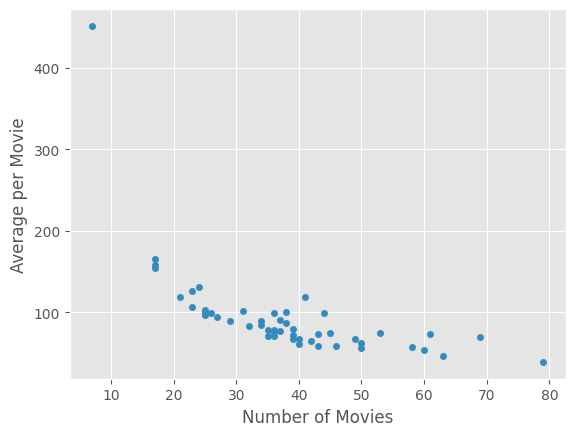

In [5]:
actors.plot(kind='scatter', x='Number of Movies', y='Average per Movie');

Observe que no gráfico acima, há uma associação _negativa_ e um valor discrepante.

### Quem esteve em 60 ou mais filmes?

In [6]:
actors[actors.get('Number of Movies') >= 60]

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Bruce Willis,3189.4,60,53.2,Sixth Sense,293.5
Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


### Quem é o estranho?

Quem quer que sejam, fizeram poucos filmes de alta bilheteria.

In [7]:
actors[actors.get('Number of Movies') < 10]

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


### Anthony Daniels

<center><img src='https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/images/c3po.png' width=200></center>

## Gráficos de linha 📉

### Conjunto de dados agregando filmes por ano

|Coluna| Conteúdo|
|------|-----------|
`'Ano'`| Ano
`'Total Bruto em Bilhões'`| Total bruto de bilheteria doméstica, em bilhões de dólares, de todos os filmes lançados
`'Número de filmes'`| Número de filmes lançados
`'Filme #1'`| Filme de maior bilheteria

In [8]:
movies_by_year = bpd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/data/movies_by_year.csv').set_index('Year')
movies_by_year

,Total Gross in Billions,Number of Movies,#1 Movie
Year,,,
2022,5.64,380,Top Gun: Maverick
2021,4.48,439,Spider-Man: No Way Home
2020,2.11,456,Bad Boys for Life
2019,11.36,910,Avengers: Endgame
2018,11.89,993,Black Panther
...,...,...,...
1981,0.90,56,Superman II
1980,1.64,68,Star Wars: Episode V - The Empire Strikes Back
1979,1.23,40,Superman


### Gráficos de linha

Como o número de filmes mudou ao longo do tempo? 🤔

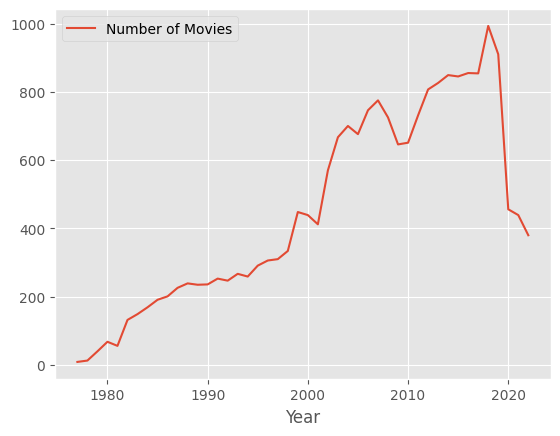

In [9]:
movies_by_year.plot(kind='line', y='Number of Movies');

### Gráficos de linha

- Os gráficos de linhas mostram tendências em variáveis ​​numéricas ao longo do tempo.
- Para criar um a partir de um DataFrame `df`, use
```
df.plot(
    kind='line', 
    x=x_column_for_horizontal, 
    y=y_column_for_vertical
)
```

### Dica de plotagem

- **Dica**: se você quiser que o eixo x seja o índice, omita o argumento `x=`!
- Não funciona para gráficos de dispersão, mas funciona para a maioria dos outros tipos de gráficos.

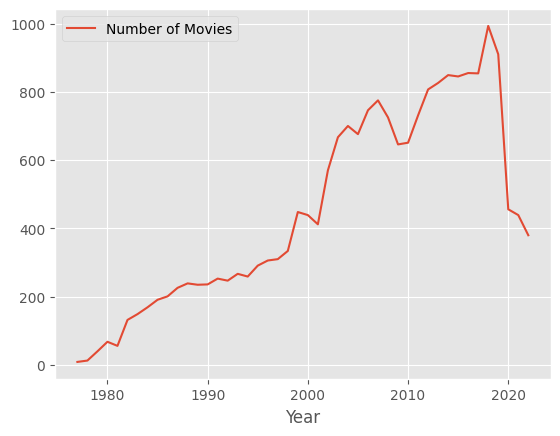

In [10]:
movies_by_year.plot(kind='line', y='Number of Movies');

### Desde o ano 2000

Podemos criar um gráfico de linhas de apenas 2.000 em diante consultando `movies_by_year` antes de chamar `.plot`.

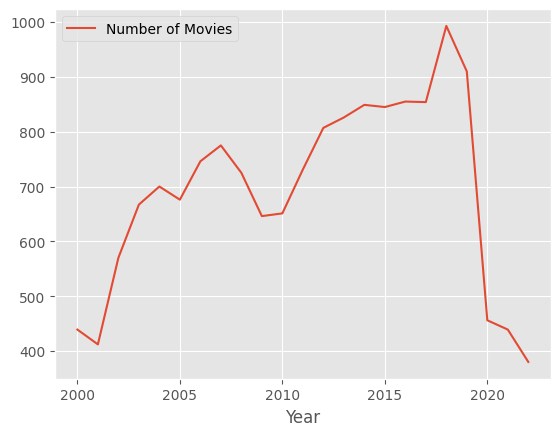

In [11]:
movies_by_year[movies_by_year.index >= 2000].plot(kind='line', y='Number of Movies');

O que você acha que explica as quedas em torno de 2008 e 2020?

### Como isso afetou o total bruto?

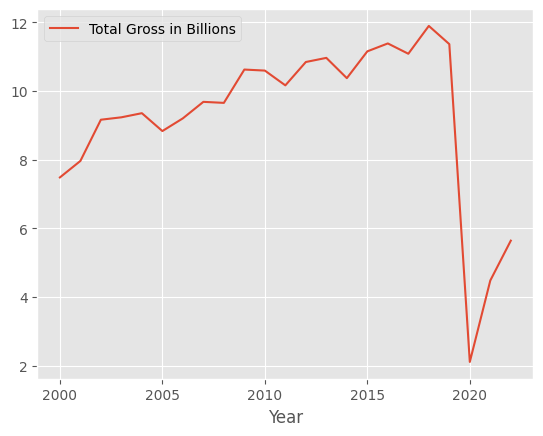

In [12]:
movies_by_year[movies_by_year.index >= 2000].plot(kind='line', y='Total Gross in Billions');

### Qual foi o filme de maior bilheteria de 2016? 🐟

In [13]:
...

Ellipsis

## Gráficos de barras 📊

### Conjunto de dados das 200 melhores músicas dos EUA no Spotify no sábado (21/01/23)

[Downloaded from here – check it out!](https://spotifycharts.com/regional)

In [14]:
charts = (bpd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/data/regional-us-daily-2023-01-21.csv')
          .set_index('rank')
          .get(['track_name', 'artist_names', 'streams', 'uri'])
         )
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Flowers,Miley Cyrus,3356361,spotify:track:0yLdNVWF3Srea0uzk55zFn
2,Kill Bill,SZA,2479445,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",1337320,spotify:track:2dHHgzDwk4BJdRwy9uXhTO
4,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin, Future, Chris Brown",1235285,spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j
5,Rich Flex,"Drake, 21 Savage",1109704,spotify:track:1bDbXMyjaUIooNwFE9wn0N
...,...,...,...,...
196,"Burn, Burn, Burn",Zach Bryan,267772,spotify:track:5jfhLCSIFUO4ndzNRh4w4G
197,LET GO,Central Cee,267401,spotify:track:3zkyus0njMCL6phZmNNEeN
198,Major Distribution,"Drake, 21 Savage",266986,spotify:track:46s57QULU02Voy0Kup6UEb


### Gráficos de barra

Quantos streams as 10 músicas mais populares têm?

In [15]:
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Flowers,Miley Cyrus,3356361,spotify:track:0yLdNVWF3Srea0uzk55zFn
2,Kill Bill,SZA,2479445,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",1337320,spotify:track:2dHHgzDwk4BJdRwy9uXhTO
4,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin, Future, Chris Brown",1235285,spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j
5,Rich Flex,"Drake, 21 Savage",1109704,spotify:track:1bDbXMyjaUIooNwFE9wn0N
...,...,...,...,...
196,"Burn, Burn, Burn",Zach Bryan,267772,spotify:track:5jfhLCSIFUO4ndzNRh4w4G
197,LET GO,Central Cee,267401,spotify:track:3zkyus0njMCL6phZmNNEeN
198,Major Distribution,"Drake, 21 Savage",266986,spotify:track:46s57QULU02Voy0Kup6UEb


In [16]:
charts.take(np.arange(10))

,track_name,artist_names,streams,uri
rank,,,,
1,Flowers,Miley Cyrus,3356361,spotify:track:0yLdNVWF3Srea0uzk55zFn
2,Kill Bill,SZA,2479445,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",1337320,spotify:track:2dHHgzDwk4BJdRwy9uXhTO
4,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin, Future, Chris Brown",1235285,spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j
5,Rich Flex,"Drake, 21 Savage",1109704,spotify:track:1bDbXMyjaUIooNwFE9wn0N
6,"Shakira: Bzrp Music Sessions, Vol. 53","Bizarrap, Shakira",1051226,spotify:track:4nrPB8O7Y7wsOCJdgXkthe
7,Just Wanna Rock,Lil Uzi Vert,998684,spotify:track:4FyesJzVpA39hbYvcseO2d
8,Anti-Hero,Taylor Swift,936166,spotify:track:0V3wPSX9ygBnCm8psDIegu
9,golden hour,JVKE,870031,spotify:track:5odlY52u43F5BjByhxg7wg


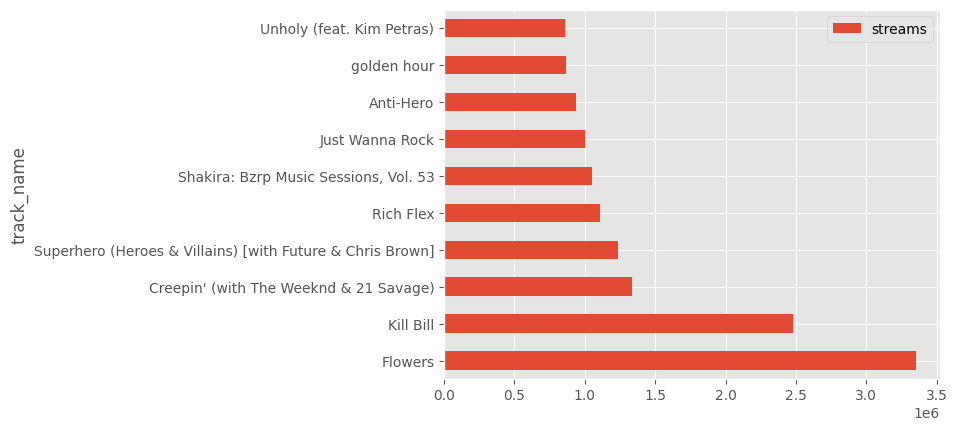

In [17]:
charts.take(np.arange(10)).plot(kind='barh', x='track_name', y='streams');

### Gráficos de barra

- Os gráficos de barras visualizam a relação entre uma variável categórica e uma variável numérica.
- Em um gráfico de barras...
- A espessura e o espaçamento das barras são arbitrários.
- A ordem dos rótulos categóricos não importa.
- Para criar um a partir de um DataFrame `df`, use
```
df.plot(
    kind='barh', 
    x=categorical_column_name, 
    y=numerical_column_name
)
```
- O **"h"** em `'barh'` significa **"horizontal"**.
- É mais fácil ler os rótulos desta forma.
- No gráfico anterior, definimos `y='Streams'` mesmo que os streams sejam medidos pelo comprimento do eixo x.

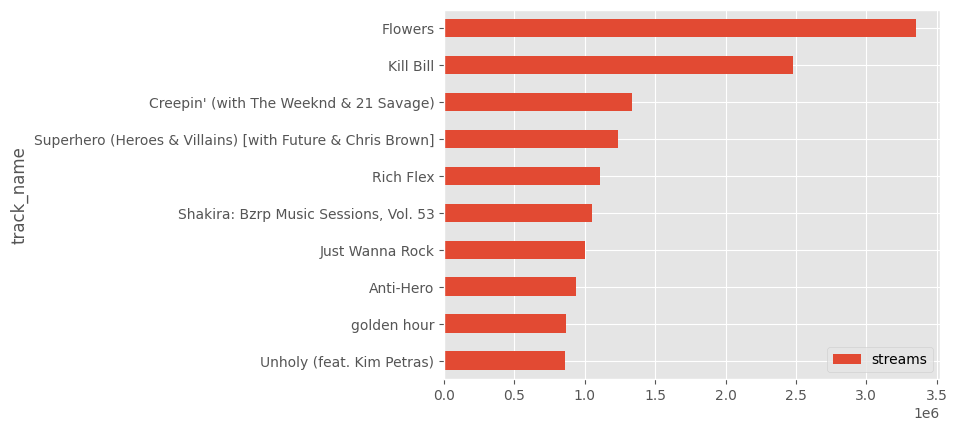

In [18]:
# The bars appear in the opposite order relative to the DataFrame
(charts
 .take(np.arange(10))
 .sort_values(by='streams')
 .plot(kind='barh', x='track_name', y='streams')
);

### Quantas músicas os 15 melhores artistas têm entre os 200 melhores?

Primeiro, vamos criar um DataFrame com uma única coluna que descreve o número de músicas entre as 200 melhores por artista. Isso envolve usar `.groupby` com `.count()`. Como queremos uma linha por artista, agruparemos por `'nomes_artistas'`.

In [19]:
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Flowers,Miley Cyrus,3356361,spotify:track:0yLdNVWF3Srea0uzk55zFn
2,Kill Bill,SZA,2479445,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",1337320,spotify:track:2dHHgzDwk4BJdRwy9uXhTO
4,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin, Future, Chris Brown",1235285,spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j
5,Rich Flex,"Drake, 21 Savage",1109704,spotify:track:1bDbXMyjaUIooNwFE9wn0N
...,...,...,...,...
196,"Burn, Burn, Burn",Zach Bryan,267772,spotify:track:5jfhLCSIFUO4ndzNRh4w4G
197,LET GO,Central Cee,267401,spotify:track:3zkyus0njMCL6phZmNNEeN
198,Major Distribution,"Drake, 21 Savage",266986,spotify:track:46s57QULU02Voy0Kup6UEb


In [20]:
songs_per_artist = charts.groupby('artist_names').count()
songs_per_artist

,track_name,streams,uri
artist_names,,,
"21 Savage, Metro Boomin",1,1,1
80purppp,1,1,1
A Boogie Wit da Hoodie,1,1,1
Arctic Monkeys,2,2,2
"Arcángel, Bad Bunny",1,1,1
...,...,...,...
XXXTENTACION,1,1,1
Yeat,1,1,1
Zach Bryan,4,4,4


Usando `.sort_values` e `.take`, manteremos apenas os 15 melhores artistas. Observe que todas as colunas em `songs_per_artist` contêm as mesmas informações (isso é uma consequência do uso de `.count()`).

In [21]:
top_15_artists = (songs_per_artist
                  .sort_values('streams', ascending=False)
                  .take(np.arange(15)))
top_15_artists

,track_name,streams,uri
artist_names,,,
SZA,11,11,11
Taylor Swift,8,8,8
Morgan Wallen,6,6,6
"Drake, 21 Savage",5,5,5
Zach Bryan,4,4,4
...,...,...,...
Joji,2,2,2
Eminem,2,2,2
Kanye West,2,2,2


Usando `.assign` e `.drop`, criaremos uma coluna chamada `'count'` que contém as mesmas informações que as outras 3 colunas contêm, e então `.get` apenas essa coluna (ou equivalentemente, eliminaremos o outras 3 colunas).

In [22]:
# If we give .get a list, it will return a DataFrame instead of a Series!
top_15_artists = (top_15_artists
                  .assign(count=top_15_artists.get('streams'))
                  .get(['count']))
top_15_artists

,count
artist_names,
SZA,11
Taylor Swift,8
Morgan Wallen,6
"Drake, 21 Savage",5
Zach Bryan,4
...,...
Joji,2
Eminem,2
Kanye West,2


Antes de chamar `.plot(kind='barh', y='count')`, classificaremos `top_15_artists` por `'count'` em ordem **crescente**. Isso ocorre porque, estranhamente, o Python inverte a ordem das linhas ao criar barras em gráficos de barras horizontais.

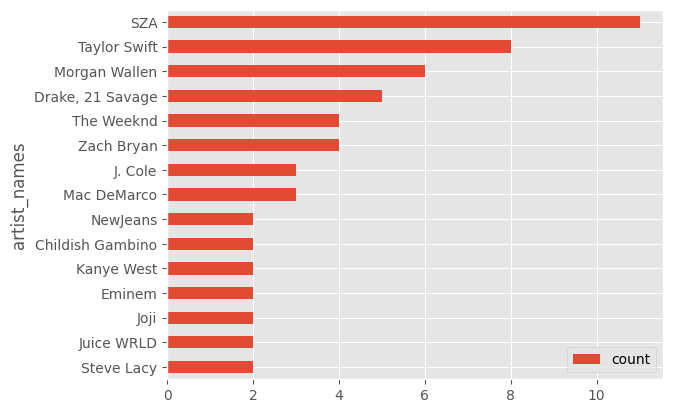

In [23]:
top_15_artists.sort_values(by='count').plot(kind='barh', y='count');

### Gráficos de barras verticais

Para criar um gráfico de barras verticais, use `kind='bar'` em vez de `kind='barh'`. No entanto, geralmente são mais difíceis de ler.

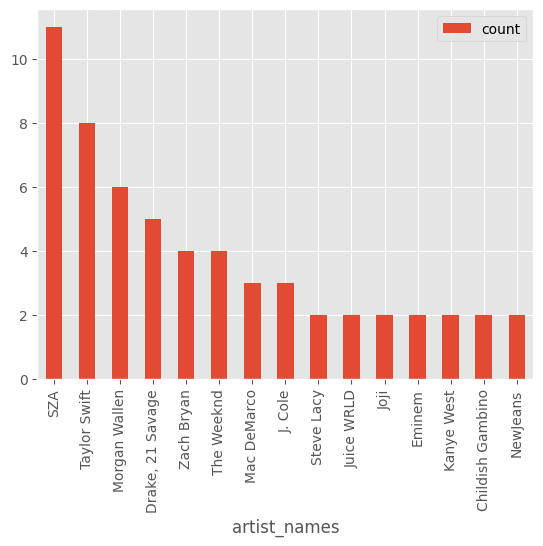

In [24]:
top_15_artists.plot(kind='bar', y='count');

### À parte: quantas transmissões as músicas do The Weeknd na parada receberam?

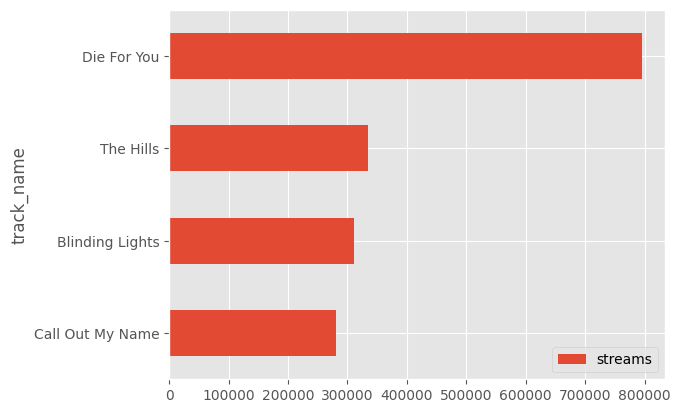

In [25]:
(charts
 [charts.get('artist_names') == 'The Weeknd']
 .sort_values('streams')
 .plot(kind='barh', x='track_name', y='streams')
);

Parece que estamos perdendo algumas músicas populares...

### Como incluímos músicas em destaque também?

Resposta: Usando `.str.contains`.

In [26]:
weeknd = charts[charts.get('artist_names').str.contains('The Weeknd')]
weeknd

,track_name,artist_names,streams,uri
rank,,,,
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",1337320,spotify:track:2dHHgzDwk4BJdRwy9uXhTO
13,Die For You,The Weeknd,794924,spotify:track:2LBqCSwhJGcFQeTHMVGwy3
76,Stargirl Interlude,"The Weeknd, Lana Del Rey",372624,spotify:track:5gDWsRxpJ2lZAffh5p7K0w
78,Starboy,"The Weeknd, Daft Punk",361999,spotify:track:7MXVkk9YMctZqd1Srtv4MB
102,The Hills,The Weeknd,334354,spotify:track:7fBv7CLKzipRk6EC6TWHOB
110,I Was Never There,"The Weeknd, Gesaffelstein",328724,spotify:track:1cKHdTo9u0ZymJdPGSh6nq
128,Blinding Lights,The Weeknd,311176,spotify:track:0VjIjW4GlUZAMYd2vXMi3b
168,Call Out My Name,The Weeknd,281141,spotify:track:09mEdoA6zrmBPgTEN5qXmN


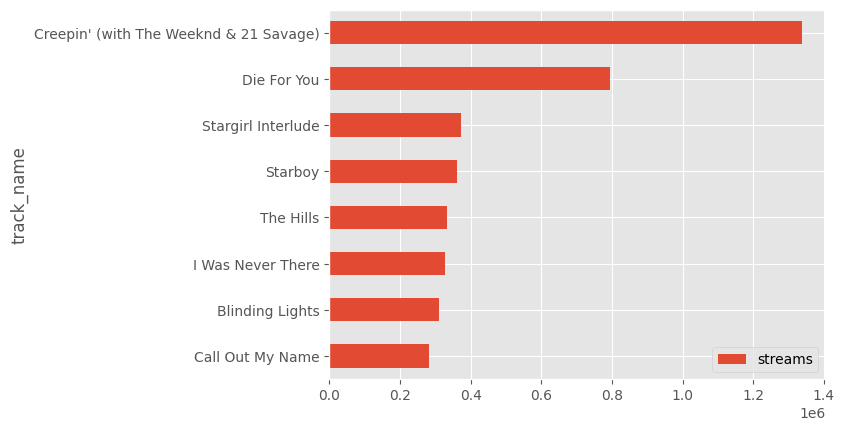

In [27]:
weeknd.sort_values('streams').plot(kind='barh', x='track_name', y='streams');

## Demonstração divertida 🎵

In [28]:
# Run this cell, don't worry about what it does.
def show_spotify(uri):
    code = uri[uri.rfind(':')+1:]
    src = f"https://open.spotify.com/embed/track/{code}"
    width = 400
    height = 75
    display(IFrame(src, width, height))

#### Vamos encontrar o URI de uma música que nos interessa.

In [29]:
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Flowers,Miley Cyrus,3356361,spotify:track:0yLdNVWF3Srea0uzk55zFn
2,Kill Bill,SZA,2479445,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",1337320,spotify:track:2dHHgzDwk4BJdRwy9uXhTO
4,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin, Future, Chris Brown",1235285,spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j
5,Rich Flex,"Drake, 21 Savage",1109704,spotify:track:1bDbXMyjaUIooNwFE9wn0N
...,...,...,...,...
196,"Burn, Burn, Burn",Zach Bryan,267772,spotify:track:5jfhLCSIFUO4ndzNRh4w4G
197,LET GO,Central Cee,267401,spotify:track:3zkyus0njMCL6phZmNNEeN
198,Major Distribution,"Drake, 21 Savage",266986,spotify:track:46s57QULU02Voy0Kup6UEb


In [30]:
favorite_song = 'Bejeweled'

In [31]:
song_uri = (charts
            [charts.get('track_name') == favorite_song]
            .get('uri')
            .iloc[0])
song_uri

'spotify:track:3qoftcUZaUOncvIYjFSPdE'

Veja o que acontece! 🎶

In [32]:
show_spotify(song_uri)

Experimente você mesmo!

### Visualizações ruins

- Conforme mencionado anteriormente, as visualizações nos permitem identificar facilmente tendências e comunicar nossos resultados a outras pessoas.
- Algumas visualizações tornam mais difícil ver a tendência nos dados, ao:

- Adicionando "[chart junk](https://eagereyes.org/criticism/chart-junk-considered-useful-after-all)."
<center><img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/images/usefuljunk-monster.jpg" width=40%></center>

- Usando eixos e tamanhos enganosos.
<center><img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/images/average_height.png" width=30%></center>

## Resumo

### Resumo

- As visualizações facilitam a extração de padrões de conjuntos de dados.
- Existem dois tipos principais de variáveis: categóricas e numéricas.
- Os tipos de variáveis ​​que estamos visualizando informam nossa escolha de qual tipo de visualização usar.
- Hoje, analisamos gráficos de dispersão, gráficos de linhas e gráficos de barras.
- **Próxima vez:** Histogramas e gráficos sobrepostos.